## PART C: FEATURE ENGINEERING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# %Loading data
df = pd.read_csv("../data/combined_data.csv")
df.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,rider_long,pickup_lat,pickup_long,drop_off_lat,drop_off_long,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings
0,ID_SCUW21PVAU,4435,27,6,09:02:54,593630,Business,0,2,Bike,...,-17.228539,-42.692371,-17.248305,-42.687442,-17.424682,1,30153,11,10.00,1
1,ID_2HA7X30JMN,32711,30,7,13:01:37,837729,Personal,0,1,Bike,...,-17.288252,-42.784046,-17.290121,-42.673267,-17.234595,2,20884,68,24.13,229
2,ID_IAJWDTBY6M,8712,14,2,10:01:00,695129,Personal,0,2,Bike,...,-17.287848,-42.765204,-17.293784,-42.813953,-17.294805,1,33143,273,24.92,123
3,ID_LKSVPNYMTR,44869,22,3,14:11:16,1504660,Personal,0,2,Bike,...,-17.311920,-42.831913,-17.315311,-42.812409,-17.265441,2,96531,168,23.76,175
4,ID_O7N8Y918YH,57590,27,5,16:11:38,36869,Business,0,2,Bike,...,-17.322818,-42.836056,-17.318111,-42.828517,-17.302052,0,103546,95,24.53,42


### FEATURE GENERATION

#### [A]  DISPATCH TIME

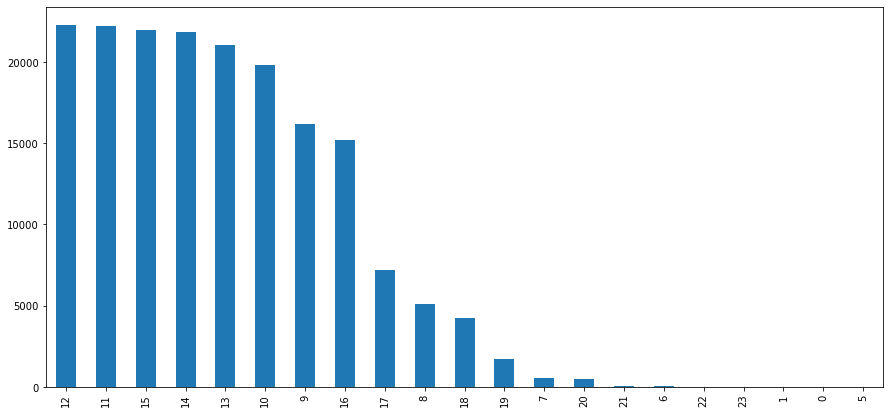

In [3]:
# %Convert time column to datetime
df['dispatch_time'] = pd.to_datetime(df['dispatch_time'])

# %Extract Hour Column
df['dispatch_hour'] = df['dispatch_time'].dt.hour

# %Let's view the hourly distribution of dispatches
df['dispatch_hour'].value_counts().plot(kind='bar',figsize=[15,7])
plt.show()

- We can see from 9 (morning) up to 16(evening) are the hours with more orders across the platform
- Less orders placed during late hours and early morning 

In [4]:
def categorize_hour(x):
    """
        function to categorize hours into four categories early,day,evening and late
    """
    if x <= 8:
        return "early"
    elif x>=9 and x<=16:
        return "day"
    elif x>16 and x<=20:
        return "evening"
    else:
        return "late"
    
    
# %Applying the function to the data
df["cat_hour"] = df["dispatch_hour"].apply(categorize_hour)

#####  HOUR CATEGORIES WITH TARGET

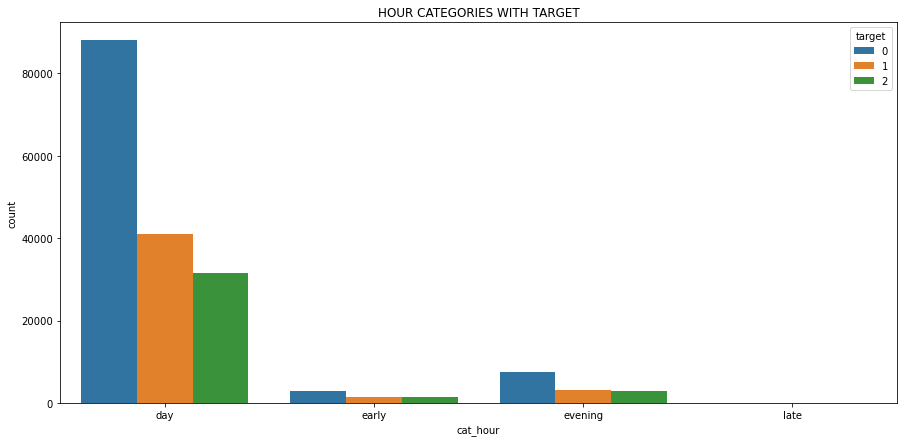

In [5]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'cat_hour', hue = 'target', data = df)
plt.title('HOUR CATEGORIES WITH TARGET')
plt.show()

#####  HOUR CATEGORIES WITH CLIENT TYPE

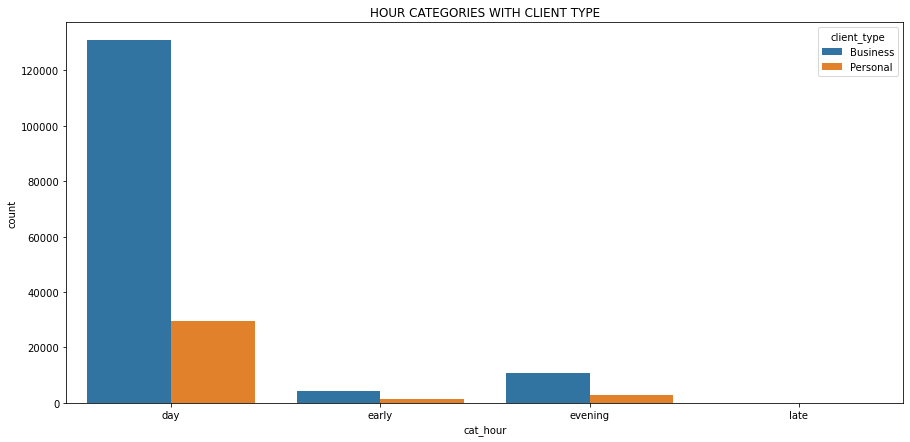

In [6]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'cat_hour', hue = 'client_type', data = df)
plt.title('HOUR CATEGORIES WITH CLIENT TYPE')
plt.show()

#### [B]  DISTANCE

This simply can be done by using latitudes and longitudes

In [7]:
# %Let's use function to compute distance between coordinates in Kms

def calculate_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    
    R = 6371  
    
    lat = lat2 - lat1
    
    lng = lng2 - lng1
    
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    
    h = 2 * R * np.arcsin(np.sqrt(d))
    
    return h


# %Let's apply the function
df['pickup_to_dropoff_distance'] = calculate_distance(df.pickup_lat, df.pickup_long, df.drop_off_lat, df.drop_off_long)
df['rider_to_dropoff_distance'] = calculate_distance(df.rider_lat, df.rider_long, df.drop_off_lat, df.drop_off_long)
df['rider_to_pickup_distance'] = calculate_distance(df.rider_lat, df.rider_long, df.pickup_lat, df.pickup_long)

In [8]:
df.head()

,ID,order_id,dispatch_day,dispatch_day_of_week,dispatch_time,client_id,client_type,order_license_status,order_carrier_type,vendor_type,...,target,Rider ID,Active Rider Age,Average Partner Rating,Number of Ratings,dispatch_hour,cat_hour,pickup_to_dropoff_distance,rider_to_dropoff_distance,rider_to_pickup_distance
0,ID_SCUW21PVAU,4435,27,6,2022-02-23 09:02:54,593630,Business,0,2,Bike,...,1,30153,11,10.00,1,9,day,14.426076,16.076117,1.746491
1,ID_2HA7X30JMN,32711,30,7,2022-02-23 13:01:37,837729,Personal,0,1,Bike,...,2,20884,68,24.13,229,13,day,13.126454,13.417651,0.394373
2,ID_IAJWDTBY6M,8712,14,2,2022-02-23 10:01:00,695129,Personal,0,2,Bike,...,1,33143,273,24.92,123,10,day,5.421337,7.224872,1.846564
3,ID_LKSVPNYMTR,44869,22,3,2022-02-23 14:11:16,1504660,Personal,0,2,Bike,...,2,96531,168,23.76,175,14,day,4.609312,4.626603,0.557483
4,ID_O7N8Y918YH,57590,27,5,2022-02-23 16:11:38,36869,Business,0,2,Bike,...,0,103546,95,24.53,42,16,day,1.554900,1.693870,0.954647


##### DISTRIBUTION OF DISTANCES

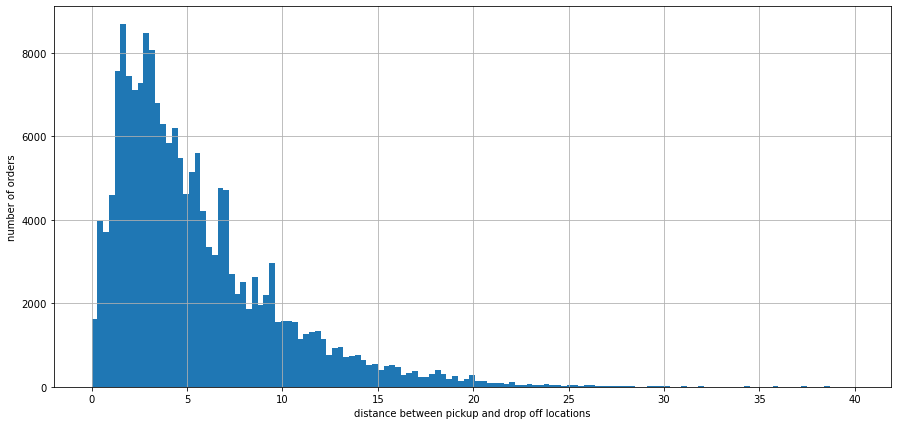

In [9]:
# %Let's view the distribution of the distance between pickup and drop off locations

bin_values = np.arange(start=0, stop=40, step=0.3)
df['pickup_to_dropoff_distance'].hist(bins=bin_values, figsize=[15,7])
plt.ylabel("number of orders")
plt.xlabel("distance between pickup and drop off locations")
plt.show()

Most of orders require a rider to cover distance less than 20 KM

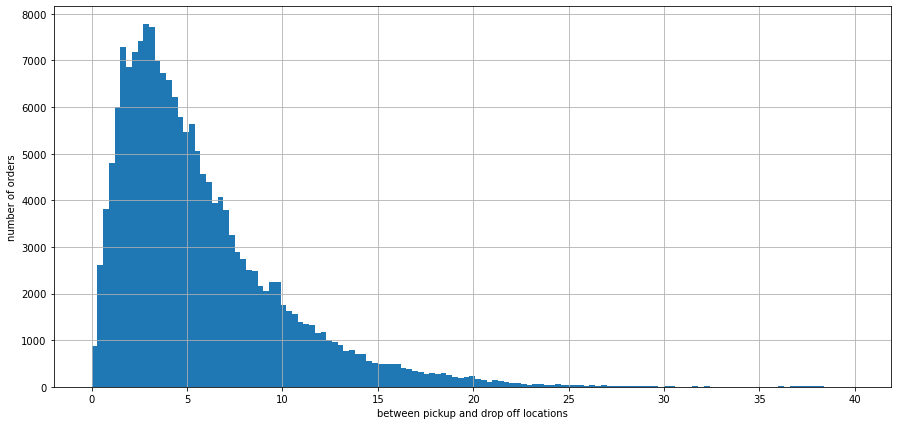

In [10]:
# %Let's view the distribution of the distance between pickup and drop off locations

bin_values = np.arange(start=0, stop=40, step=0.3)
df['rider_to_dropoff_distance'].hist(bins=bin_values, figsize=[15,7])
plt.ylabel("number of orders")
plt.xlabel("between pickup and drop off locations")
plt.show()

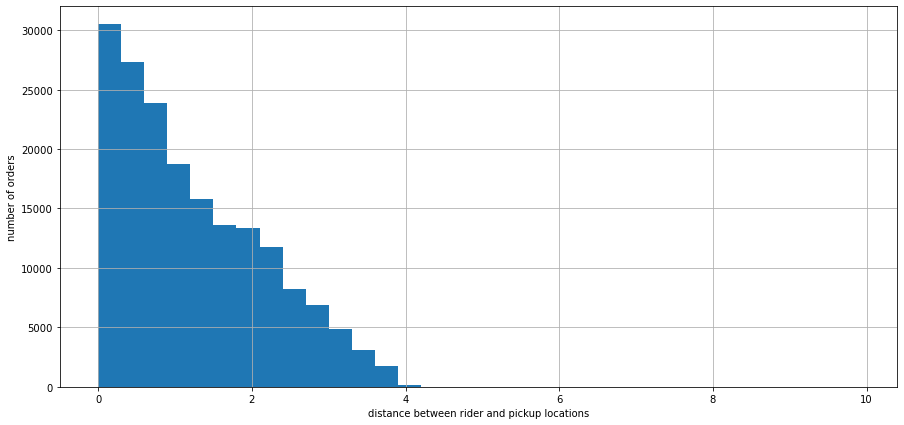

In [11]:
# %Let's view the distribution of the distance between rider and pickup locations

bin_values = np.arange(start=0, stop=10, step=0.3)
df['rider_to_pickup_distance'].hist(bins=bin_values, figsize=[15,7])
plt.ylabel("number of orders")
plt.xlabel("distance between rider and pickup locations")
plt.show()

#### [C]  RATINGS

In [12]:
# %Let's find rating factor for a particular rider
df['RF_@rider'] = df['Number of Ratings'] * df['Average Partner Rating']

In [13]:
df.shape

(179867, 31)

In [14]:
# %Before hand let's remove some Columns

df.drop(["ID","order_id","dispatch_time","client_id","rider_id","Rider ID"], axis=1, inplace=True)

### SAVING CLEAN DATA

In [15]:
df.to_csv("../data/Final_data_0.csv",index=False)